## Teorema del límite central 
#### (Comprobado con la simulación del lanzamiento de dados)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, randint

%matplotlib inline

### Variable aleatoria X (uniforme discreta)
Valores posibles, x = 1, 2, 3, 4, 5, 6

Probabilidades, p(x) = 1/6, 1/6, 1/6, 1/6, 1/6, 1/6

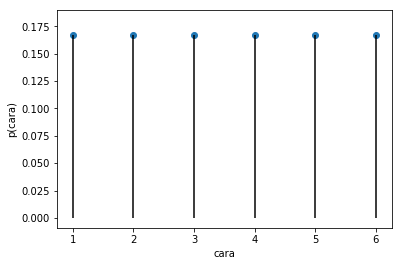

In [2]:
dado = [1,2,3,4,5,6]
dado
p_cara = [ 1/6, 1/6, 1/6, 1/6, 1/6, 1/6 ]
plt.scatter( dado, p_cara);
plt.xlabel('cara')
plt.ylabel('p(cara)')
plt.vlines(dado,0,1/6);

In [3]:
ndados = int(input('Número de dados:'))
tiradas = int(input('Número de tiradas:'))
dados = np.random.randint(1,6+1,(tiradas,ndados))
#dados[:10]

Número de dados:10
Número de tiradas:1000


### Nueva variable aleatoria: suma de las caras
$S =  X_1 + X_2 + \cdots + X_n$

Valores posibles, $s = n, n+1, \cdots , 6 * n$

Los estadísticos, media y varianza, son fáciles de calcular:

$<S> =  <X_1> + <X_2> + \cdots + <X_n> = n <X> = n * 3.5$

$var(S) =  var(X_1) + var(X_2) + \cdots + var(X_n) = n * var(X) = n * 35/12$

Pero ¿cuál será su función de distribución, $p(s), s = n, n+1, \cdots , 6 * n$?


In [4]:
# Truco para sumar las caras de los dados: sumo por filas, (fijo la columna)
s = np.sum(dados,axis=1)
#s[:10]

# teoría, experimento
mu_t = 3.5 * ndados
mu_e = s.mean()
print('teoría = 3.5 * n = {}, experimento = {:.2f}'.format(mu_t, mu_e))

teoría = 3.5 * n = 35.0, experimento = 35.14


In [5]:
sigma_t = np.sqrt( ndados * 35 / 12 )
sigma_e = s.std()
print('teoría = {}, experimento = {:.2f}'.format(round(sigma_t,6), sigma_e ))

teoría = 5.400617, experimento = 5.39


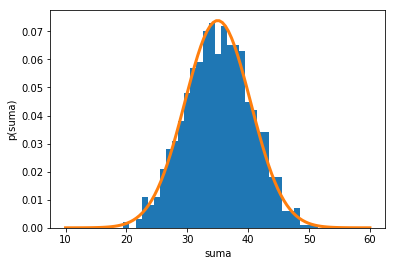

In [6]:
x = np.linspace(ndados,6*ndados,100)

plt.hist(s,bins=np.arange(ndados,6*ndados)+0.5, density=True);

plt.plot(x,norm.pdf(x,mu_t,sigma_t),lw=3);

plt.xlabel('suma');
plt.ylabel('p(suma)');

In [ ]:
norm.cdf(20,mu_t,sigma_t)

In [ ]:
ic99 = norm.interval(.99,mu_t,sigma_t)
(ic99[1]-ic99[0])/(6*ndados-ndados)